# Initial Check

In [1]:
import os

base_dir = 'Dataset_Split/train'

anorak_dir = os.path.join(base_dir, 'Bomber')
blazer_dir = os.path.join(base_dir, 'Button-down')

print('total training anorak images:', len(os.listdir(anorak_dir)))
print('total training blazer images:', len(os.listdir(blazer_dir)))

anorak_files = os.listdir(anorak_dir)
print(anorak_files[:10])

blazer_files = os.listdir(blazer_dir)
print(blazer_files[:10])


total training anorak images: 247
total training blazer images: 264
['28994img_00000001.jpg', '28995img_00000002.jpg', '28996img_00000003.jpg', '28998img_00000005.jpg', '28999img_00000006.jpg', '29000img_00000007.jpg', '29001img_00000008.jpg', '29002img_00000009.jpg', '29003img_00000010.jpg', '29004img_00000011.jpg']
['28527img_00000001.jpg', '28528img_00000002.jpg', '28529img_00000003.jpg', '28531img_00000005.jpg', '28532img_00000006.jpg', '28533img_00000007.jpg', '28534img_00000008.jpg', '28535img_00000009.jpg', '28536img_00000010.jpg', '28537img_00000011.jpg']


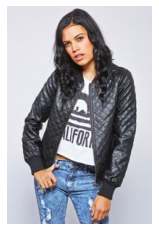

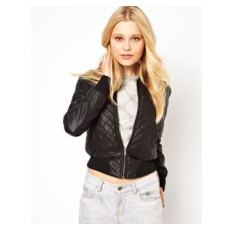

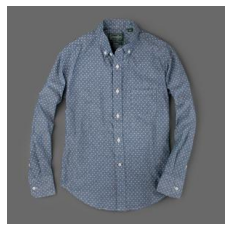

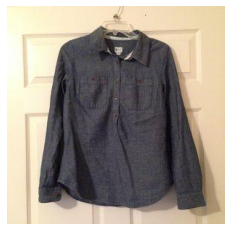

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_anorak = [os.path.join(anorak_dir, fname) 
                for fname in anorak_files[pic_index-2:pic_index]]
next_blazer = [os.path.join(blazer_dir, fname) 
                for fname in blazer_files[pic_index-2:pic_index]]


for i, img_path in enumerate(next_anorak+next_blazer):
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

# Import

In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop


# Build Model

In [4]:
#large-large model
import tensorflow as tf

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    

    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    # The second convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    
    # The third convolution
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    
    # The fourth convolution
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
     
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(46, activation='softmax')
])

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 296, 296, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 148, 148, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 146, 146, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 144, 144, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 72, 72, 128)      0         
 2D)                                                    

In [7]:
#large-large model
import tensorflow as tf

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution

    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.6),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.6),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.6),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.6),
    tf.keras.layers.Dense(5, activation='softmax')
])

# Print the model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_31 (Conv2D)          (None, 298, 298, 64)      1792      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 149, 149, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 147, 147, 64)      36928     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 73, 73, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_33 (Conv2D)          (None, 71, 71, 128)       73856     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 35, 35, 128)     

In [10]:
#medium-large model
import tensorflow as tf

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.7),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.7),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.7),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.7),
    tf.keras.layers.Dense(20, activation='softmax')
])

# Print the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 298, 298, 64)      1792      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 149, 149, 64)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 147, 147, 64)      36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 73, 73, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 71, 71, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 35, 35, 64)      

In [6]:
#medium-medium model
import tensorflow as tf

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(46, activation='softmax')
])

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 64)       0

In [5]:
from tensorflow.keras.optimizers import Adam
# Set the training parameters
model.compile(loss = 'categorical_crossentropy', optimizer=Adam(learning_rate=0.002), metrics=['accuracy'])

In [12]:
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = "Dataset_Split/train"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=10,
      width_shift_range=0.1,
      height_shift_range=0.1,
      shear_range=0.1,
      zoom_range=0.1,
      horizontal_flip=False,
      fill_mode='nearest')

VALIDATION_DIR = "Dataset_Split/val"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(300,300),
	class_mode='categorical',
  batch_size=10
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(300,300),
	class_mode='categorical',
  batch_size=10
)

Found 231349 images belonging to 46 classes.
Found 57863 images belonging to 46 classes.


# Model Training

In [13]:
# Train the model
history = model.fit(train_generator, epochs=250, steps_per_epoch=20, validation_data = validation_generator, verbose = 1, validation_steps=2)

Epoch 1/250
20/20 [==============================] - 10s 284ms/step - loss: 2.5704 - accuracy: 0.2450 - val_loss: 2.7581 - val_accuracy: 0.3000
Epoch 2/250
20/20 [==============================] - 6s 282ms/step - loss: 2.6745 - accuracy: 0.2500 - val_loss: 2.8859 - val_accuracy: 0.2000
Epoch 3/250
20/20 [==============================] - 6s 283ms/step - loss: 2.7034 - accuracy: 0.2450 - val_loss: 2.9764 - val_accuracy: 0.2500
Epoch 4/250
20/20 [==============================] - 6s 296ms/step - loss: 2.8383 - accuracy: 0.2400 - val_loss: 3.3445 - val_accuracy: 0.0000e+00
Epoch 5/250
20/20 [==============================] - 6s 278ms/step - loss: 2.7726 - accuracy: 0.2200 - val_loss: 2.5323 - val_accuracy: 0.3000
Epoch 6/250
20/20 [==============================] - 5s 259ms/step - loss: 2.9244 - accuracy: 0.1800 - val_loss: 2.9937 - val_accuracy: 0.2500
Epoch 7/250
20/20 [==============================] - 6s 284ms/step - loss: 2.7467 - accuracy: 0.3000 - val_loss: 3.0701 - val_accuracy: 0

# Loss Acc Visualization

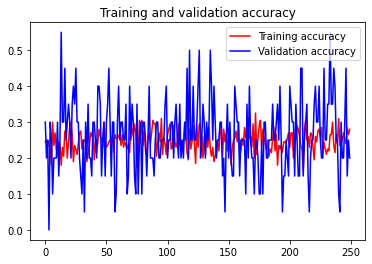

<Figure size 432x288 with 0 Axes>

In [14]:
import matplotlib.pyplot as plt

# Plot the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

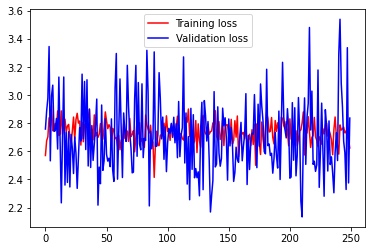

<Figure size 432x288 with 0 Axes>

In [15]:
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.legend(loc=0)
plt.figure()

plt.show()

In [16]:
from scipy.stats import linregress
# Test the slope of your val_acc curve
slope, *_ = linregress(epochs, val_acc)
print(f"The slope of your validation acc is {slope:.5f}")

The slope of your validation acc is 0.00003


In [17]:
# Test the slope of your val_loss curve
slope, *_ = linregress(epochs, val_loss)
print(f"The slope of your validation loss curve is {slope:.5f}")

The slope of your validation loss curve is -0.00013


# Model save

In [18]:
# Save the entire model as a SavedModel.
# !mkdir saved_model
model.save('my_model.h5')

In [59]:
# Save the entire model as a SavedModel.
!mkdir saved_model_HDF5
model.save('saved_model_HDF5/my_model.h5')

A subdirectory or file saved_model_HDF5 already exists.


# Model Load

In [19]:
# Recreate the exact same model, including its weights and the optimizer
new_model = tf.keras.models.load_model('my_model.h5')

# Show the model architecture
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 296, 296, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 148, 148, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 146, 146, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 144, 144, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 72, 72, 128)      0         
 2D)                                                    

# Model Testing

In [20]:
# load_model_sample.py
from keras.models import load_model
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import os


def load_image(img_path, show=False):

    img = image.load_img(img_path, target_size=(300, 300))
    img_tensor = image.img_to_array(img)                    # (height, width, channels)
    img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    img_tensor /= 255.                                      # imshow expects values in the range [0, 1]

    if show:
        plt.imshow(img_tensor[0])                           
        plt.axis('off')
        plt.show()

    return img_tensor


if __name__ == "__main__":

    # load model
    model = load_model("my_model.h5")

    # image path
    img_path = 'Dataset_Split/val/Anorak/img_00000008.jpg'

    # load a single image
    new_image = load_image(img_path)

    # check prediction
    pred = model.predict_step(new_image)
    
    print(pred[0])
 


tf.Tensor(
[6.73616771e-04 2.55555548e-02 8.05302784e-02 1.11484143e-03
 9.69036366e-04 3.48519708e-04 6.48660003e-04 3.63834687e-02
 1.46304490e-03 6.36249129e-03 1.02141763e-04 1.43500022e-03
 5.89852221e-03 2.79630899e-01 1.58155302e-03 3.16768885e-04
 8.90657248e-05 3.78919765e-03 1.15883080e-02 3.72064263e-02
 2.04002056e-02 1.93615037e-03 2.20665149e-03 2.29983314e-04
 1.72522329e-02 1.73201729e-02 3.47527472e-04 7.00656045e-03
 1.73110086e-02 3.01666587e-04 1.24536781e-03 5.41917572e-04
 3.32431425e-03 5.61722147e-04 2.34041978e-02 4.19902761e-04
 6.39571324e-02 5.55284545e-02 4.01624888e-02 1.04789715e-02
 3.60733061e-03 5.73587157e-02 1.29482090e-01 2.73697842e-02
 2.01219716e-03 5.45828370e-04], shape=(46,), dtype=float32)


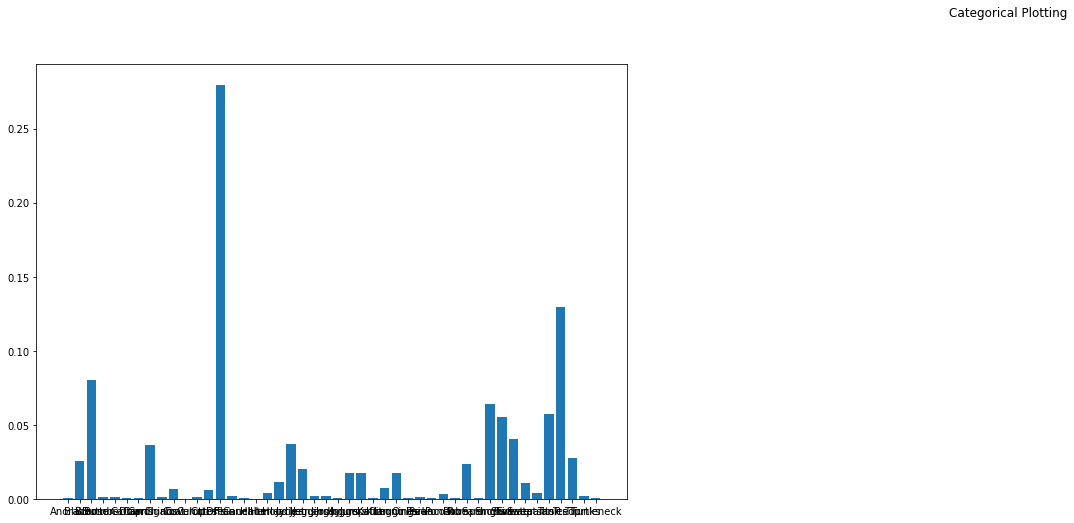

In [21]:
names = ['Anorak', 'Blazer', 'Blouse', 'Bomber', 'Button-Down', 'Caftan', 'Capris', 'Cardigan',
         'Chinos', 'Coat', 'Coverup', 'Culottes', 'Cutoffs', 'Dress', 'Flannel', 'Gauchos', 'Halter',
         'Henley', 'Hoodie', 'Jacket', 'Jeans', 'Jeggings', 'Jersey', 'Jodhpurs', 'Joggers', 'Jumpsuit', 'Kaftan',
         'Kimono', 'Leggings', ' Onesie', 'Parka', 'Peancoat', 'Poncho', 'Robe', 'Romper', 'Sarong',
         'Shorts', 'Skirt', 'Sweater', 'Sweatpants', 'Sweatshorts', 'Tank', 'Tee', 'Top', 'Trunks', 'Turtleneck']
values = np.array(pred[0])

plt.figure(figsize=(36, 8))

plt.subplot(131)
plt.bar(names, values)
plt.suptitle('Categorical Plotting')
plt.show()

# Confusion Matrix

In [10]:
y_pred = model.predict(validation_generator)

In [101]:
for i in y_pred:
    print(i)
# print(pred[0])

AttributeError: 'numpy.ndarray' object has no attribute 'filenames'

Anorak


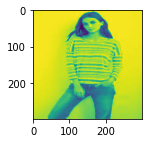

Anorak


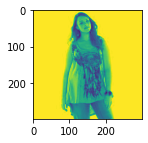

In [32]:
import matplotlib.pyplot as plt
import os
n = 2
x,y = validation_generator.next()
for i in range(0,n):
    plt.figure(figsize=(2, 2))
    image_x = x[i,:,:,0]
    image_label = os.path.dirname(validation_generator.filenames[i]) # only OK if shuffle=false
    print(image_label)
    plt.imshow(image_x)
    plt.show()

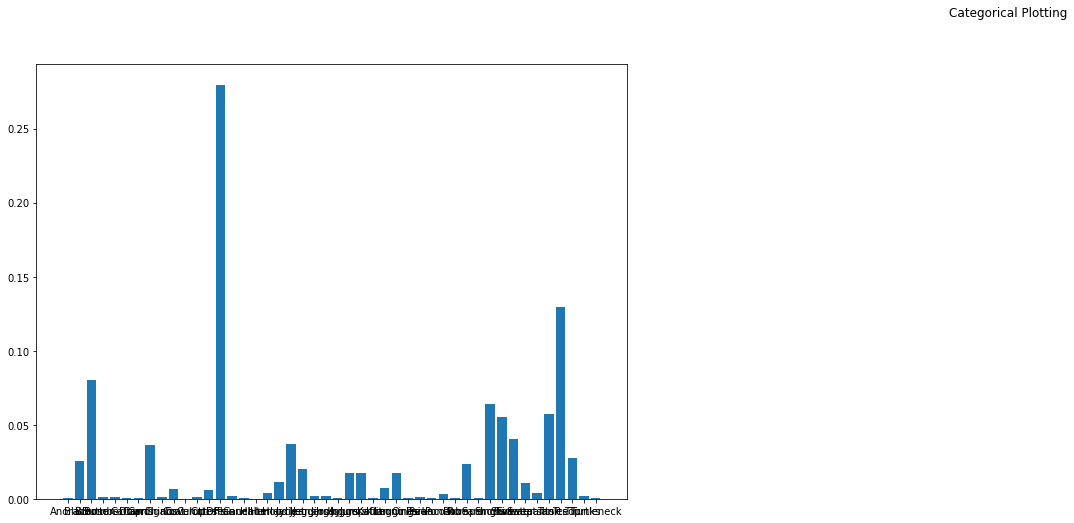

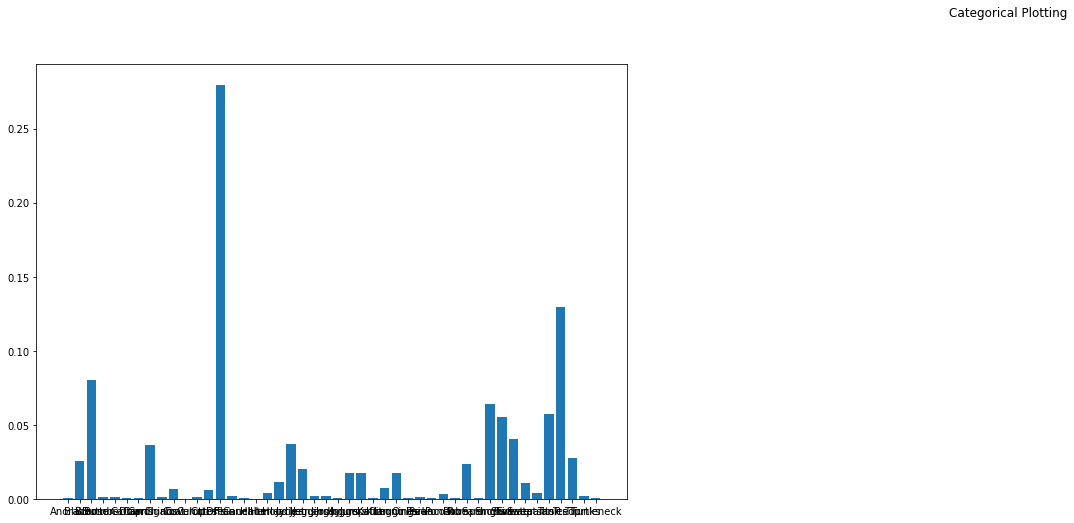

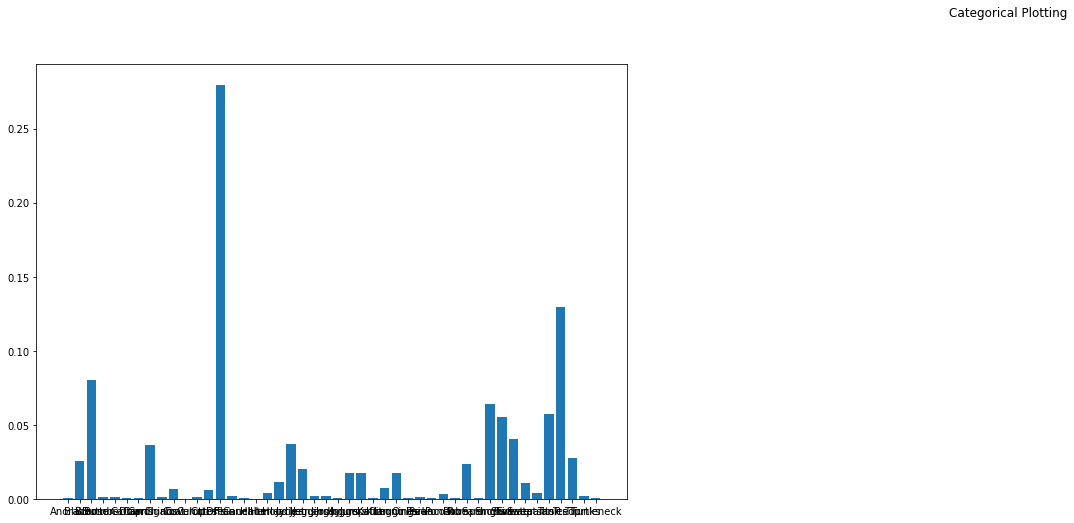

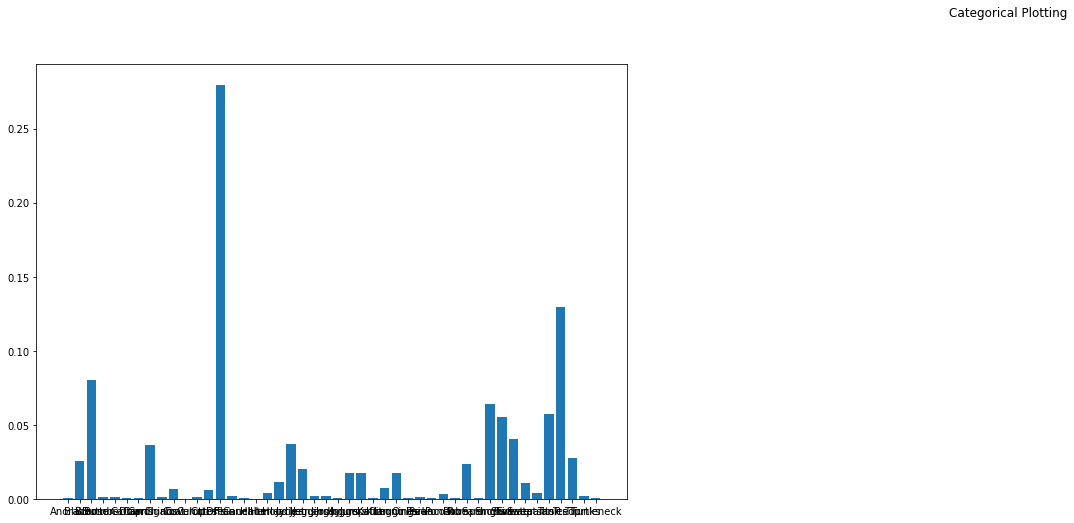

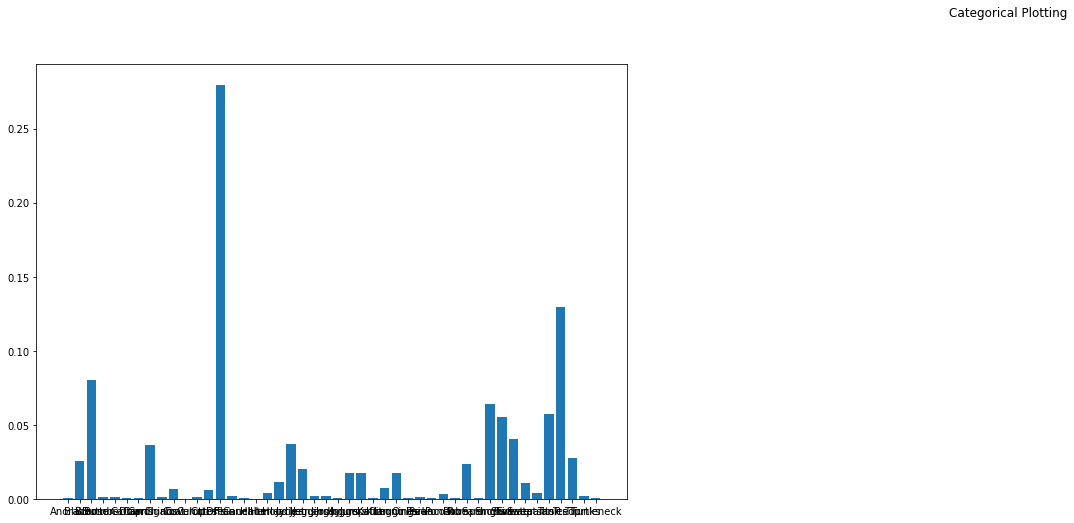

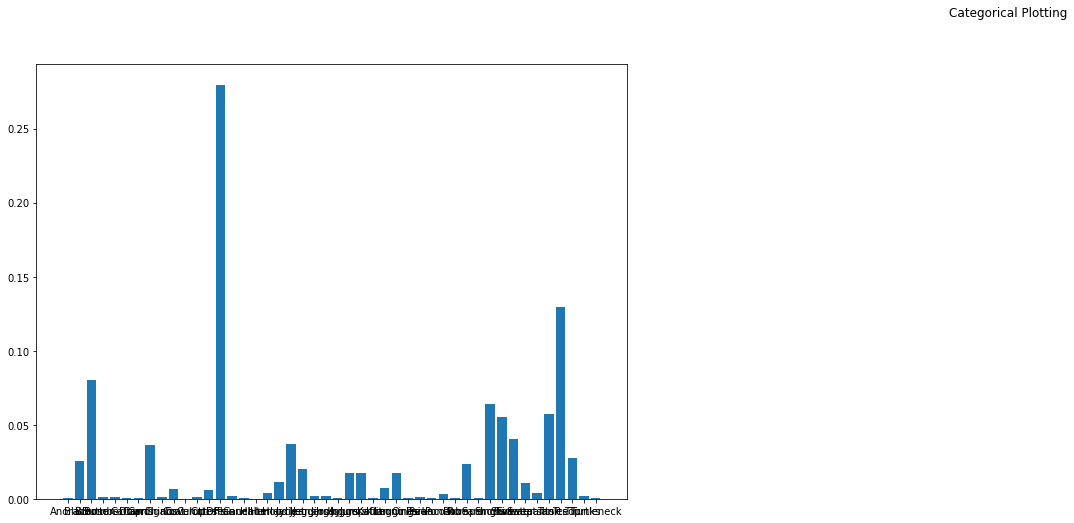

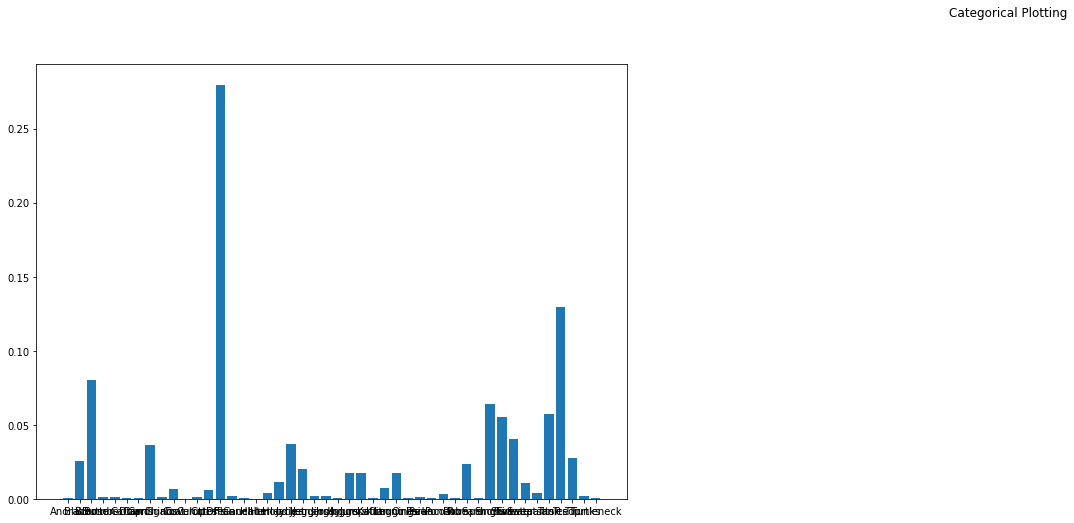

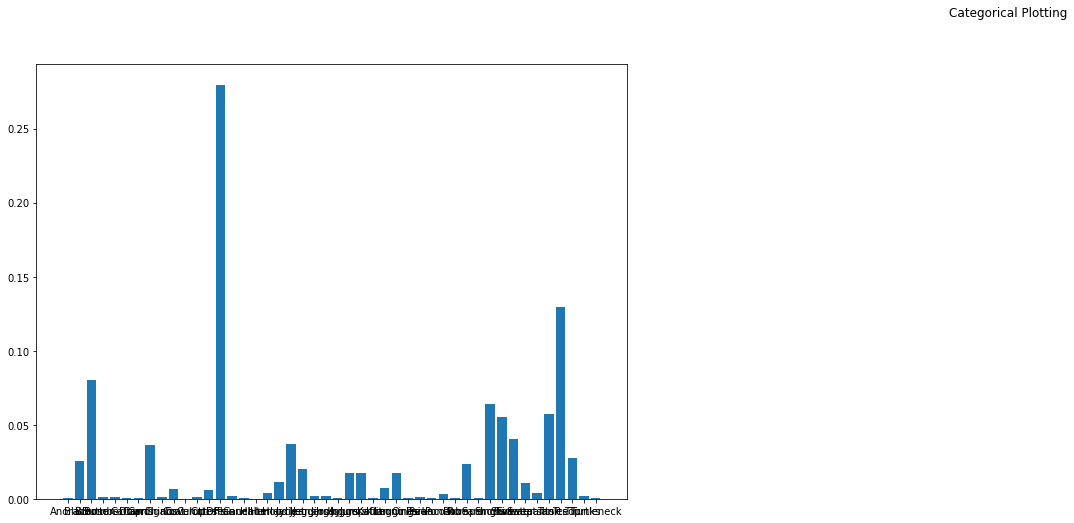

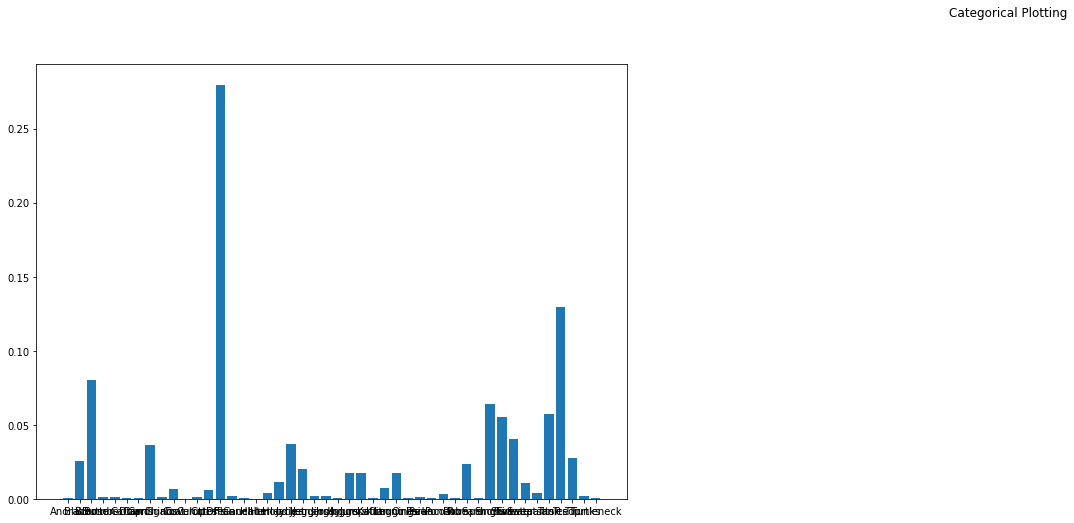

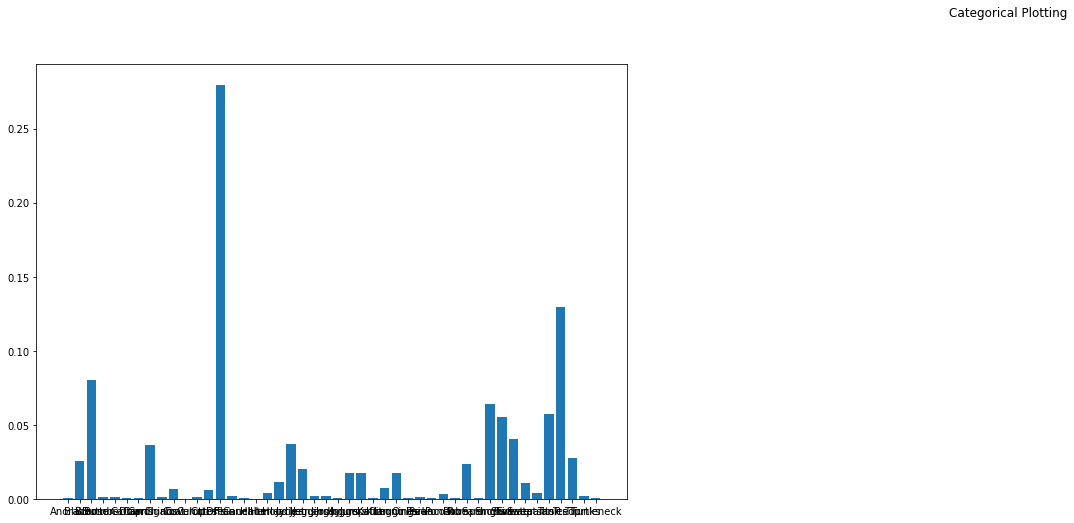

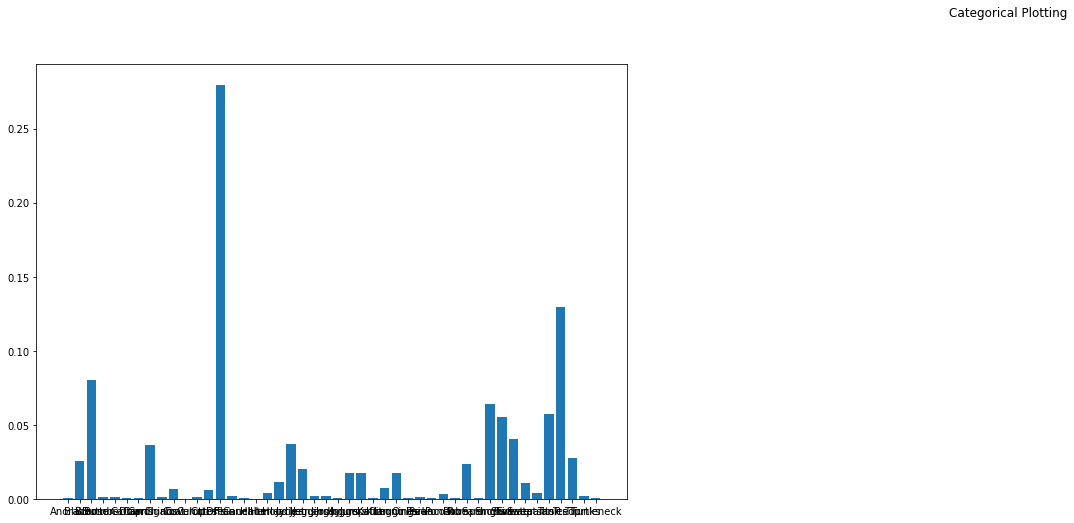

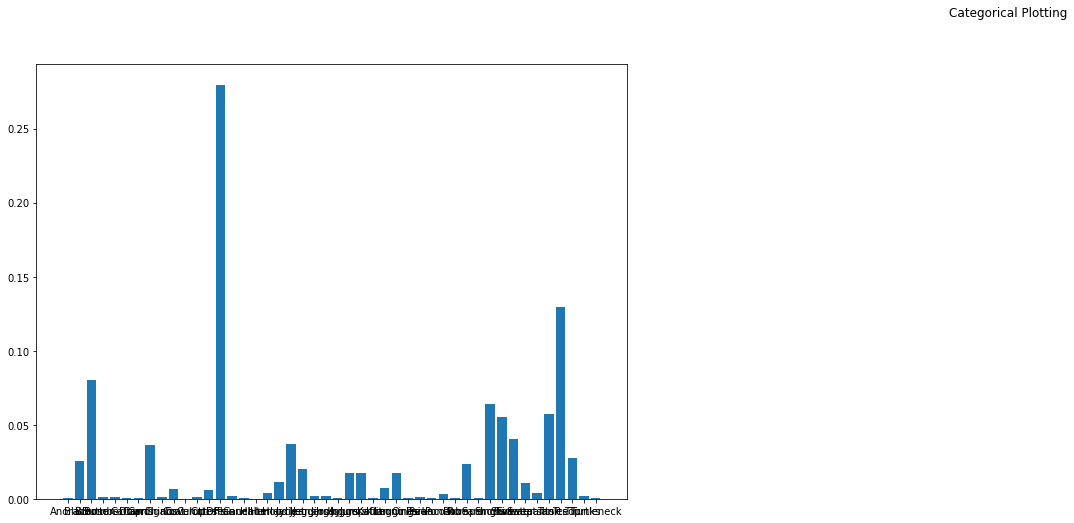

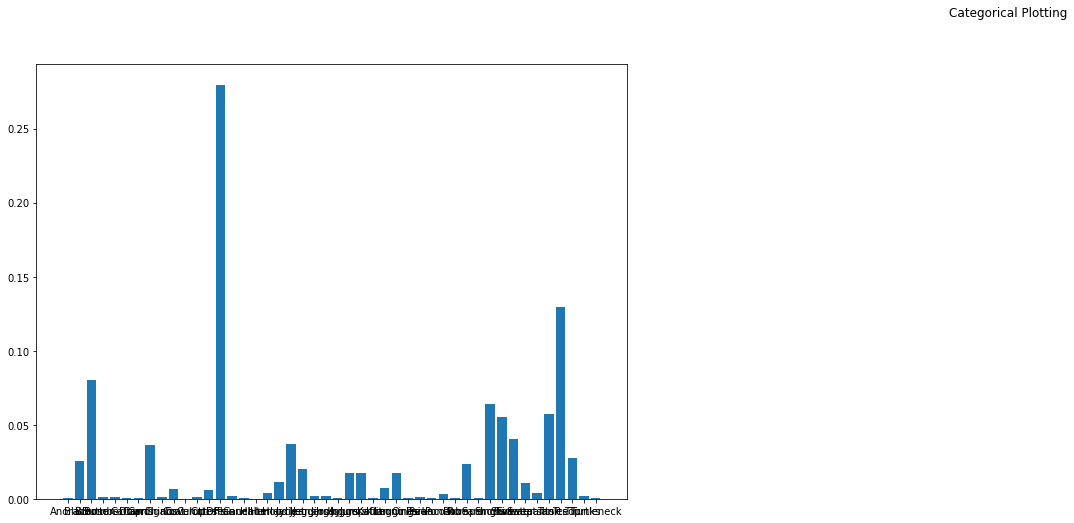

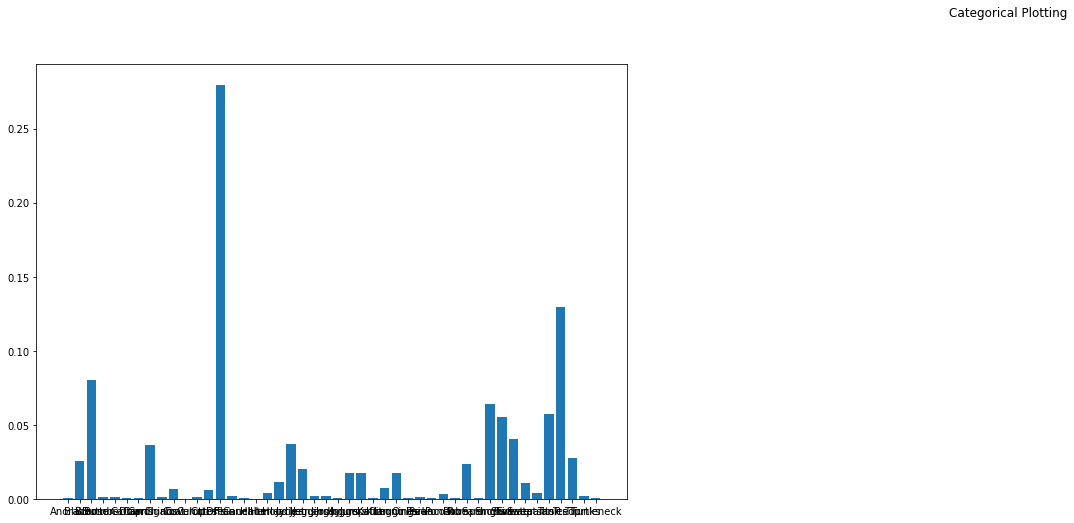

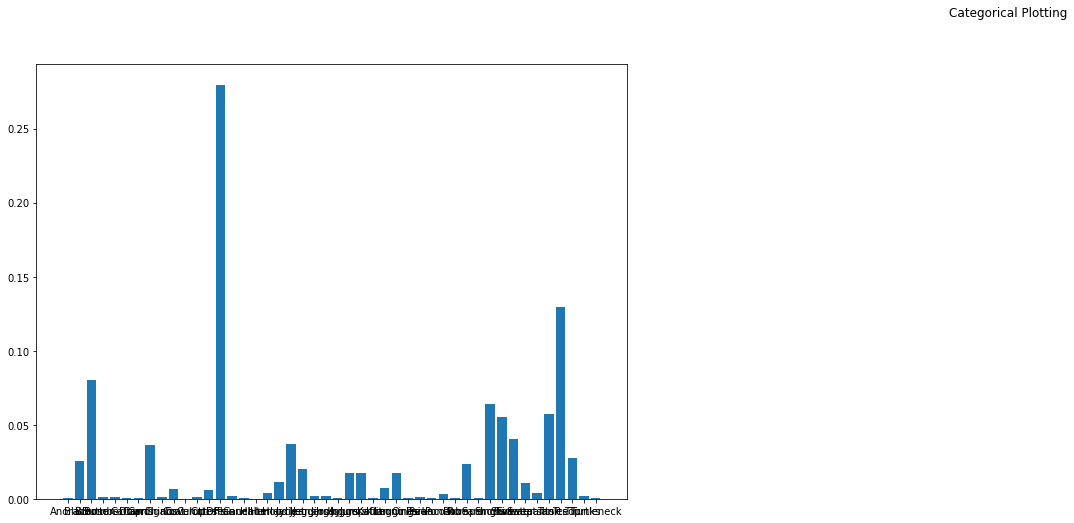

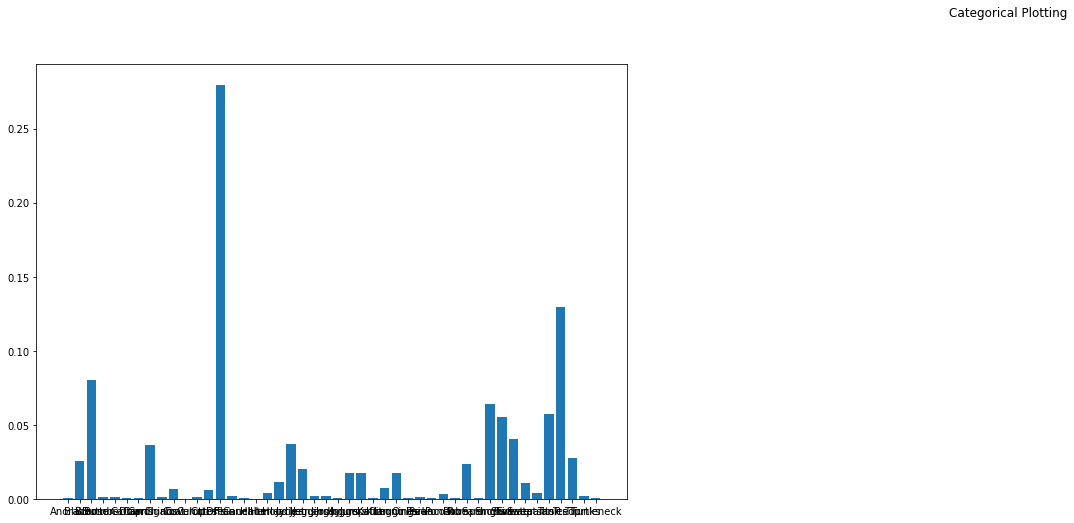

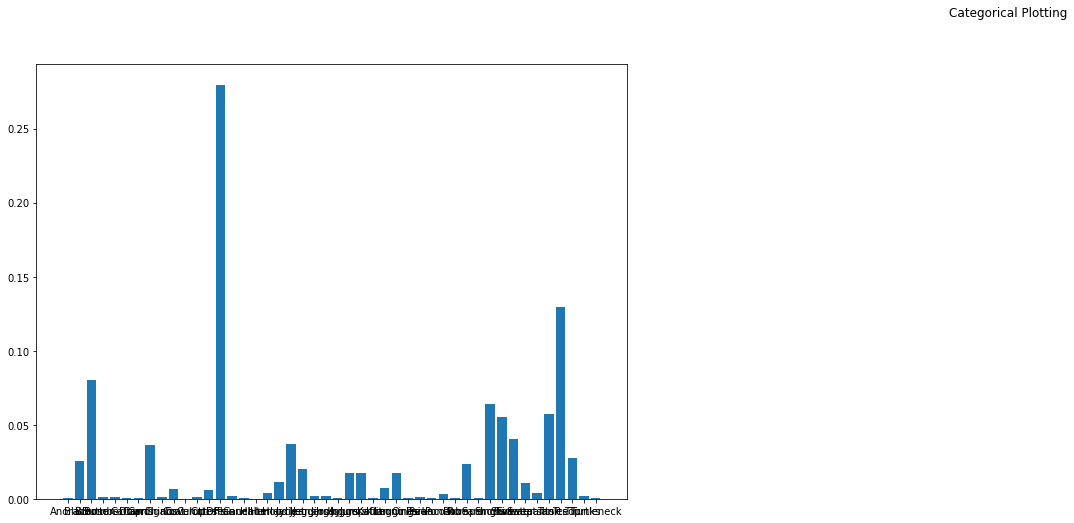

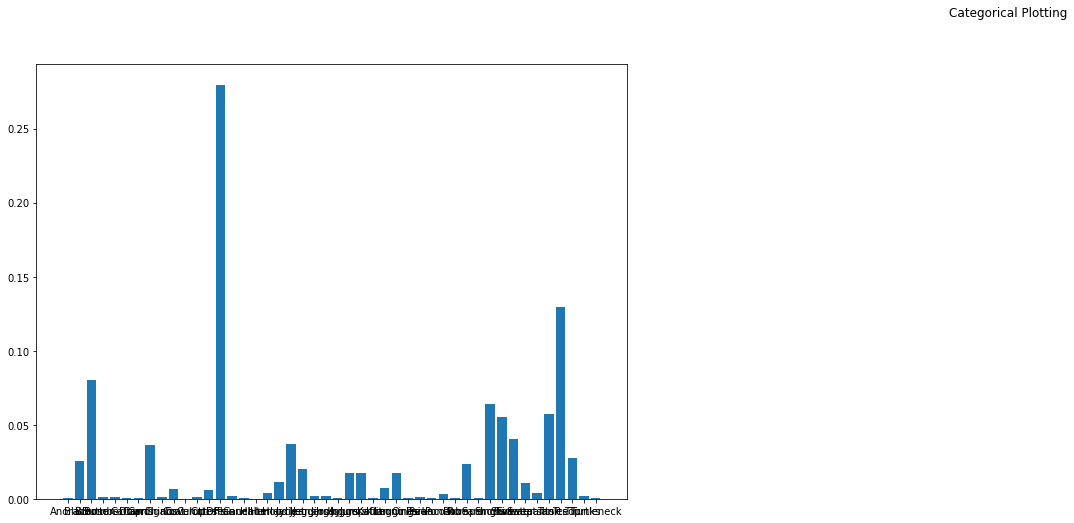

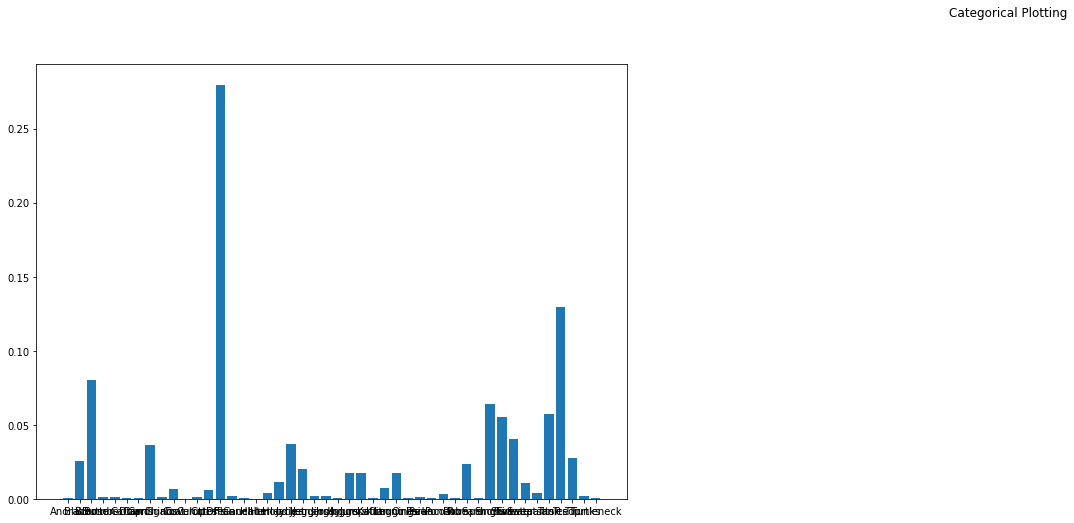

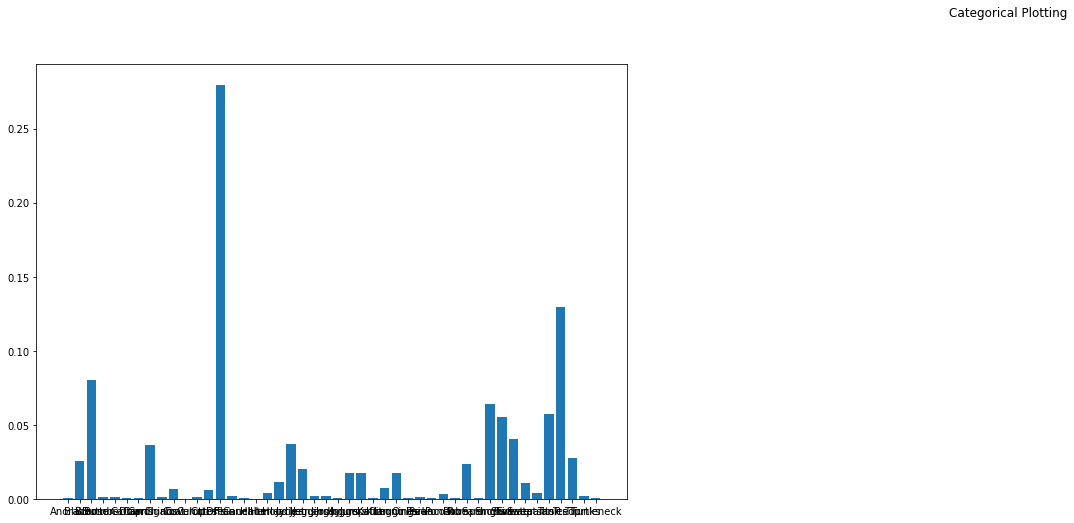

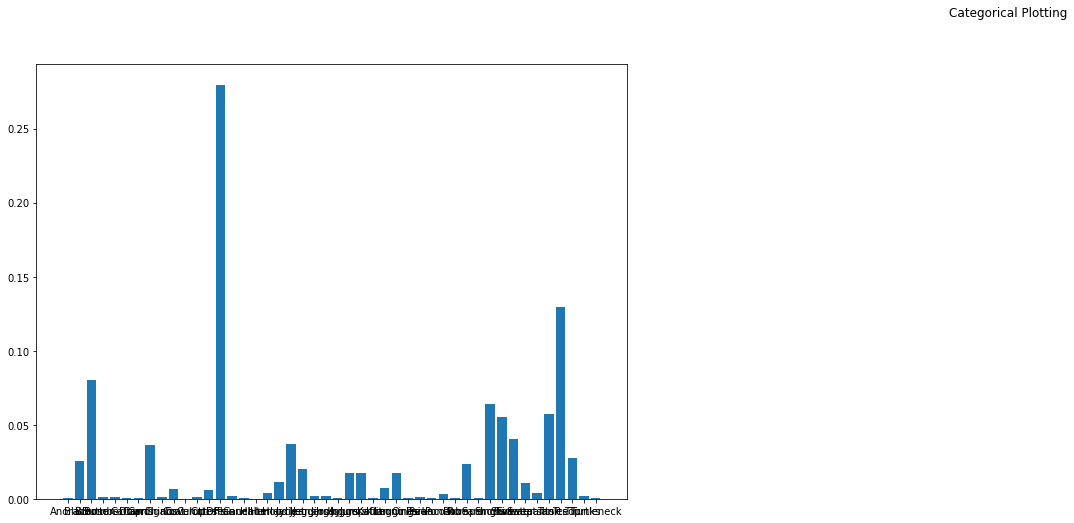

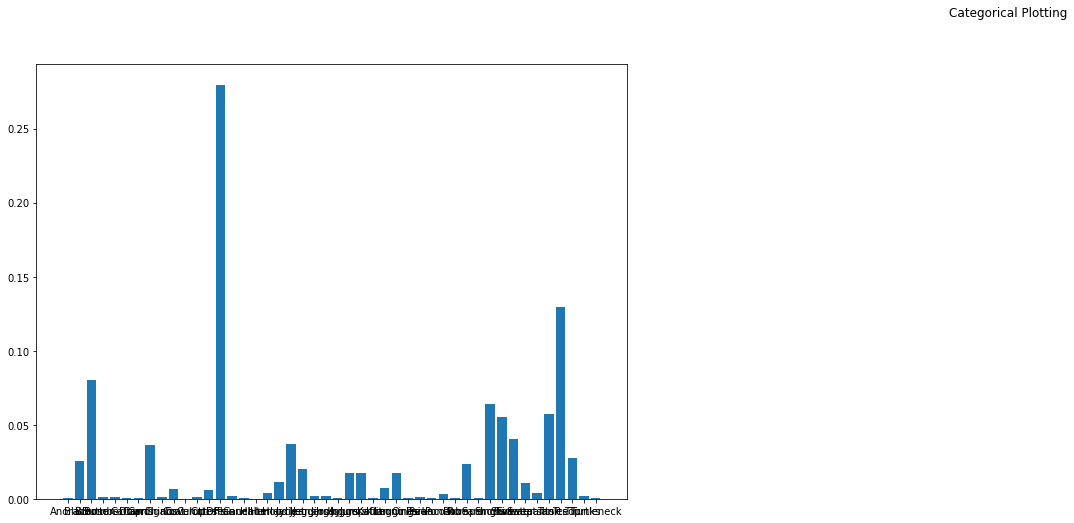

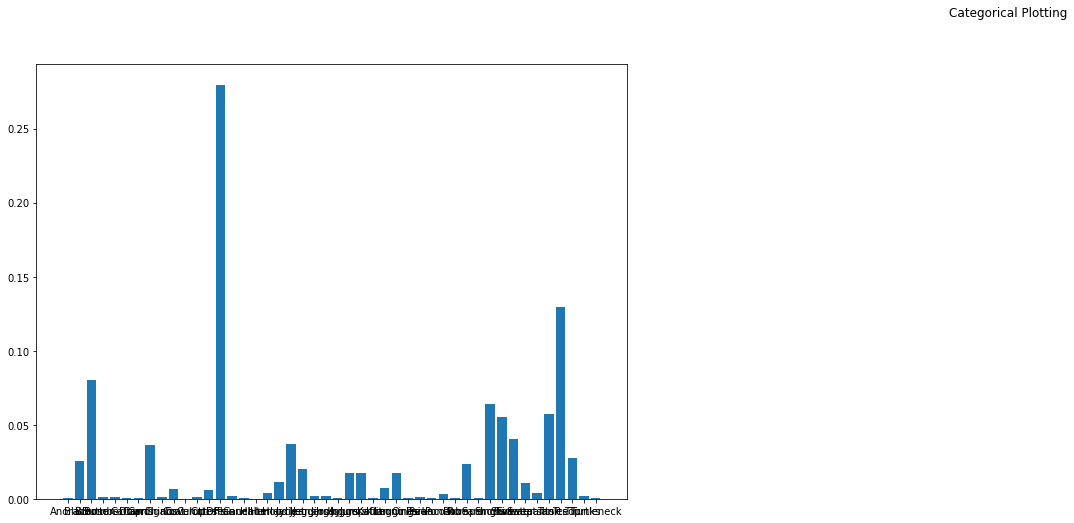

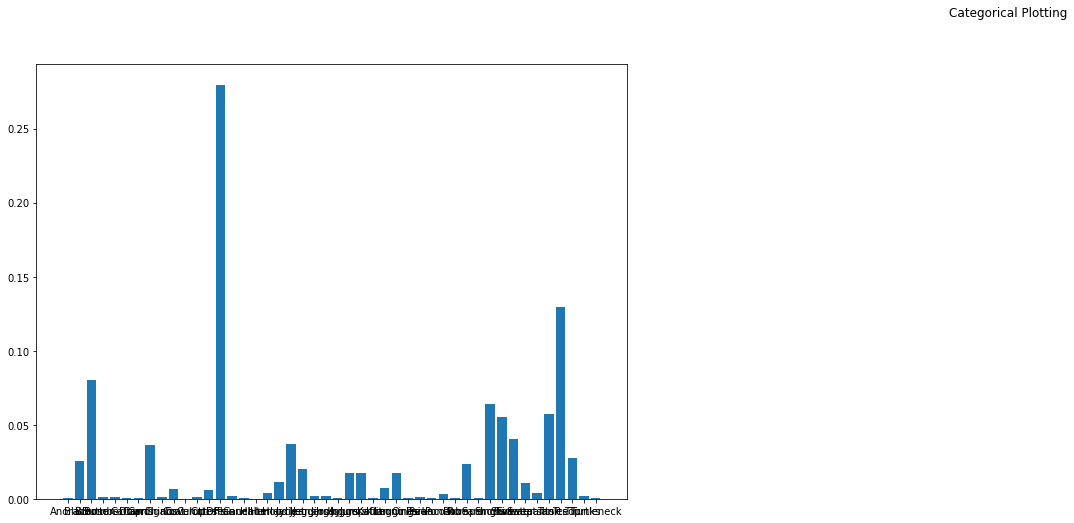

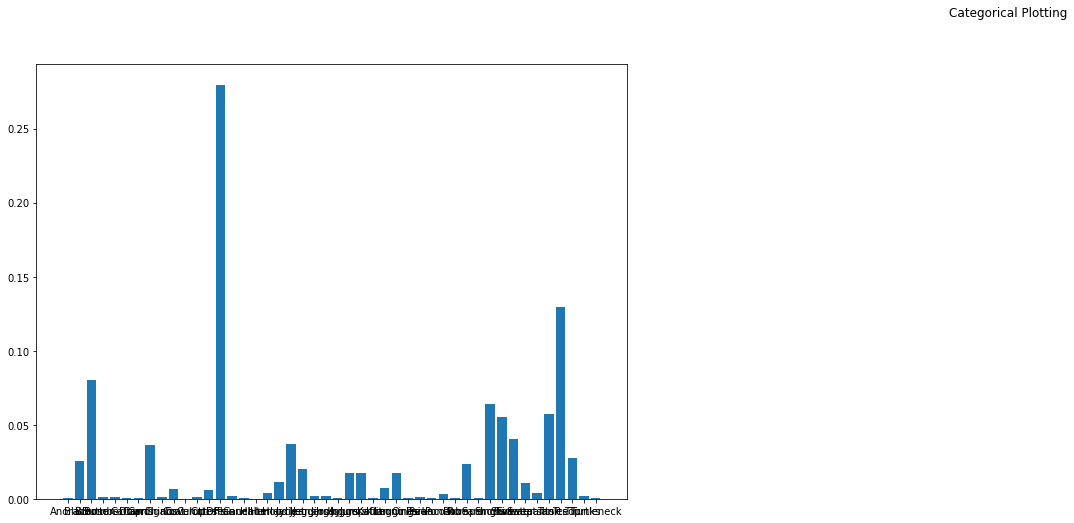

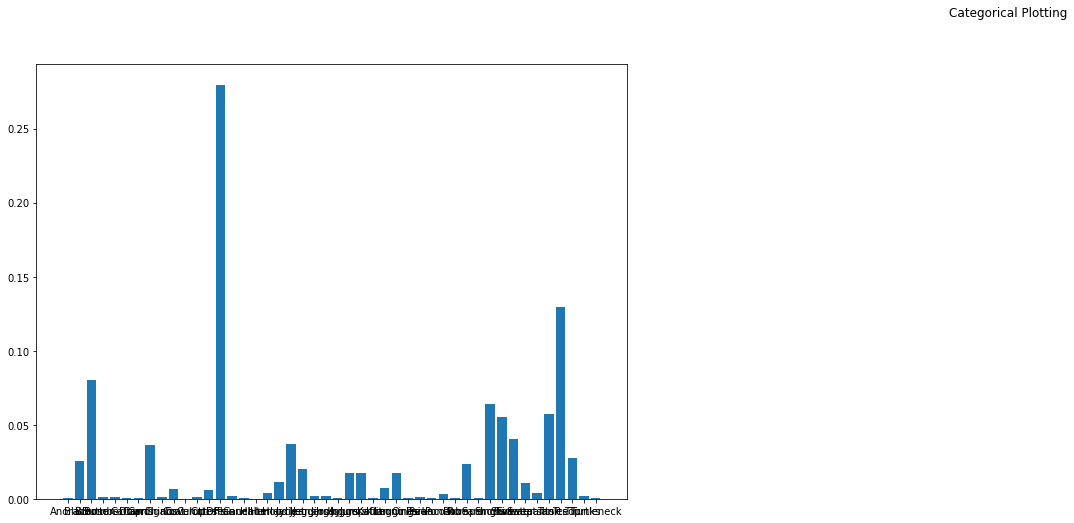

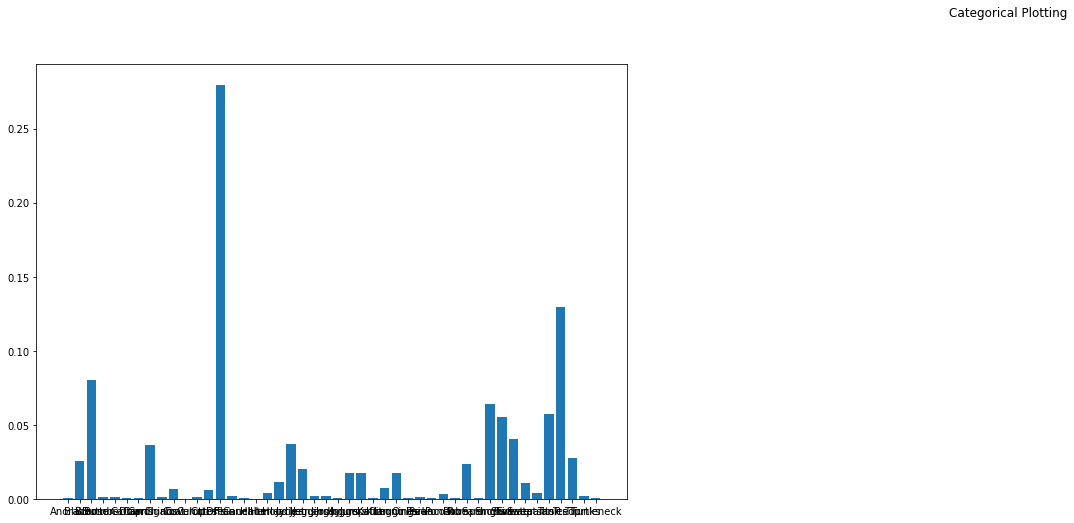

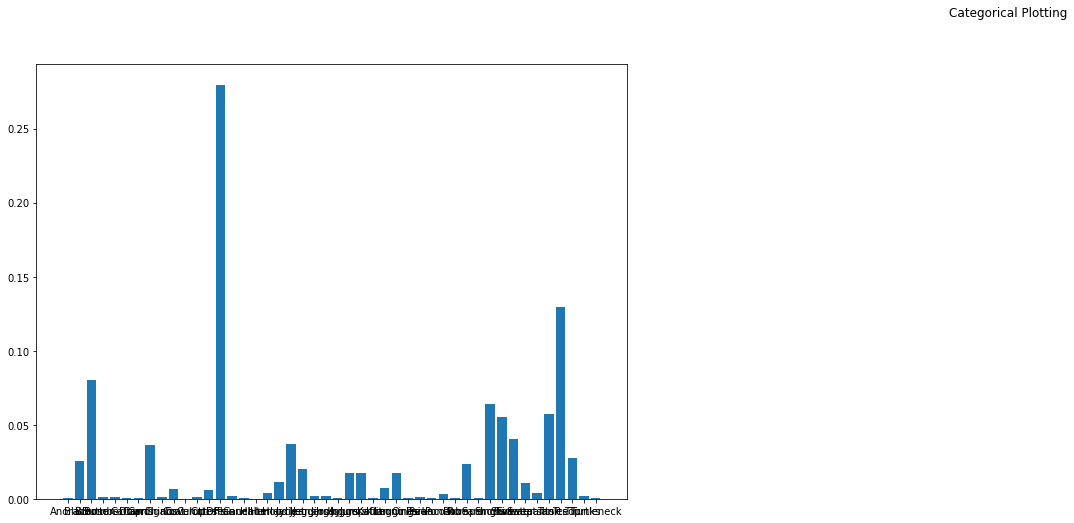

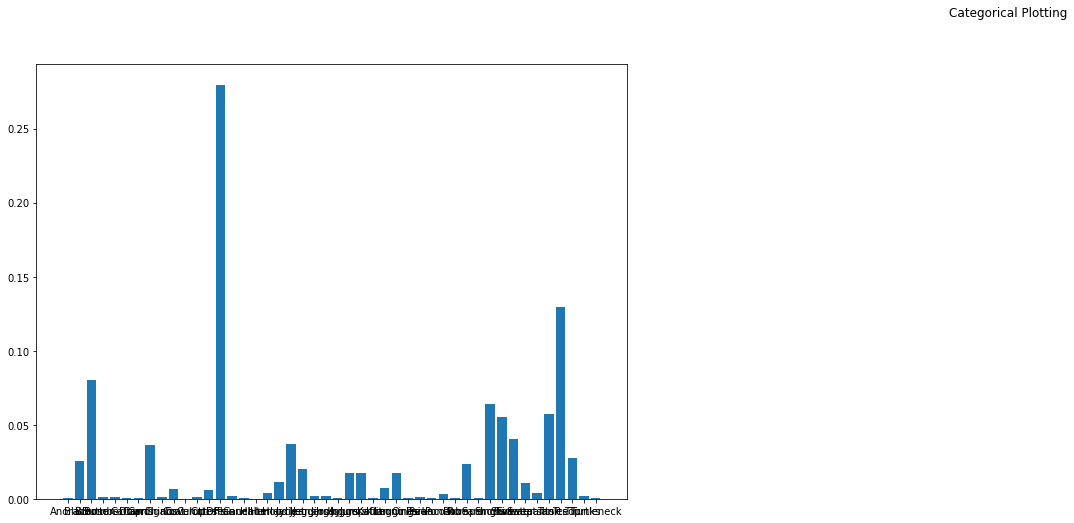

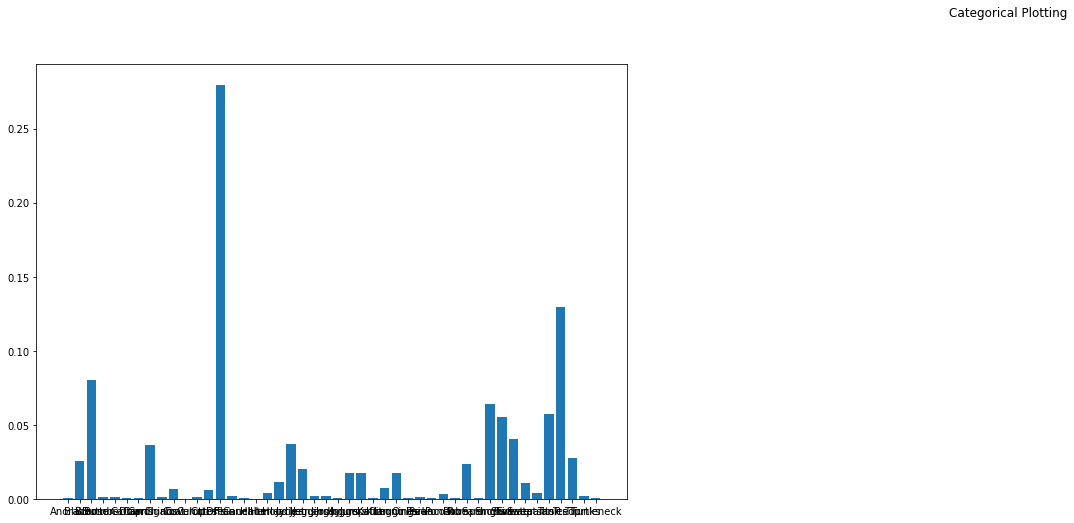

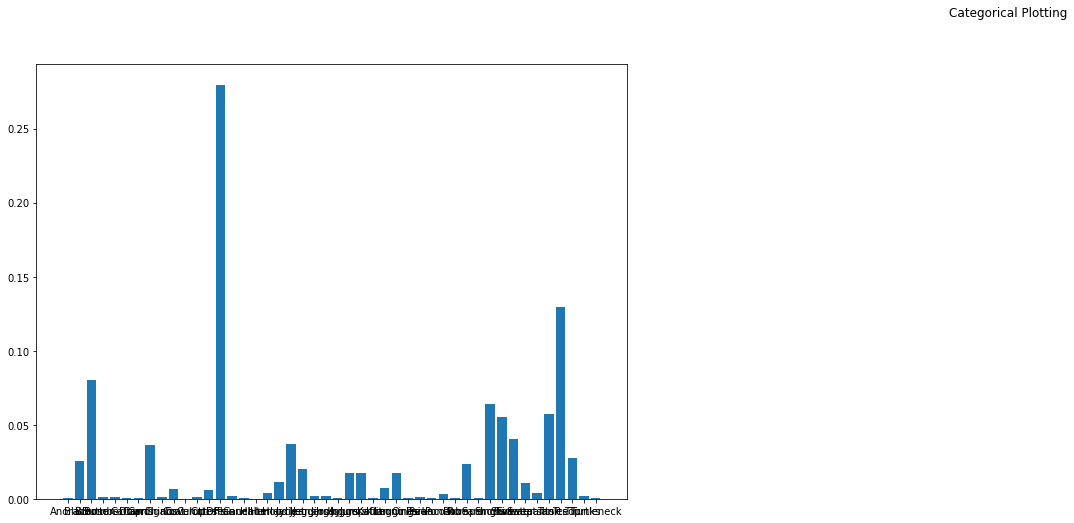

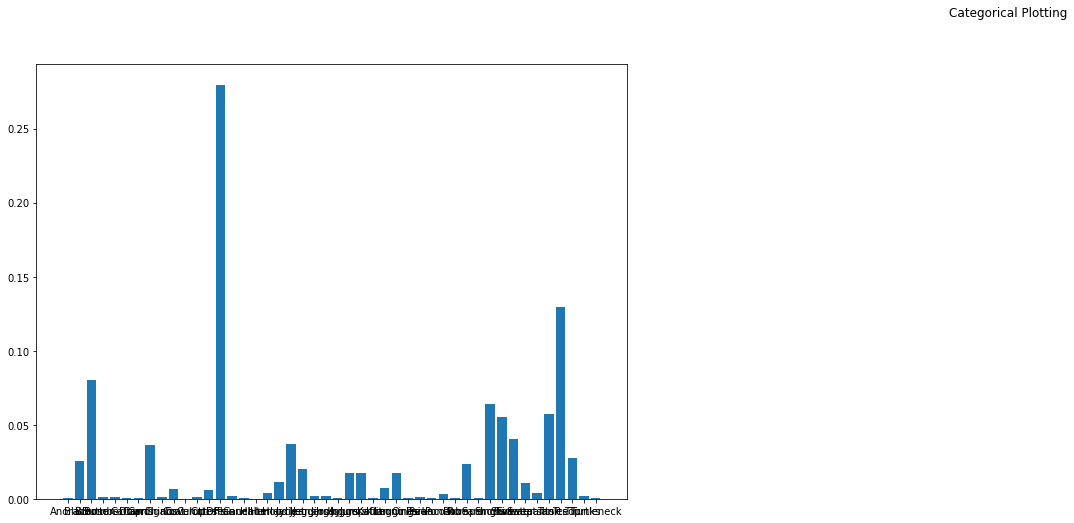

In [57]:
img_path = 'Dataset_Split/val/Anorak'
isi = os.listdir(img_path)
for data in range (0, len(isi)):
    a = os.path.join(img_path, isi[data])
    new_image = load_image(a)
    pred = model.predict_step(new_image)

    names = ['Anorak', 'Blazer', 'Blouse', 'Bomber', 'Button-Down', 'Caftan', 'Capris', 'Cardigan',
            'Chinos', 'Coat', 'Coverup', 'Culottes', 'Cutoffs', 'Dress', 'Flannel', 'Gauchos', 'Halter',
            'Henley', 'Hoodie', 'Jacket', 'Jeans', 'Jeggings', 'Jersey', 'Jodhpurs', 'Joggers', 'Jumpsuit', 'Kaftan',
            'Kimono', 'Leggings', ' Onesie', 'Parka', 'Peancoat', 'Poncho', 'Robe', 'Romper', 'Sarong',
            'Shorts', 'Skirt', 'Sweater', 'Sweatpants', 'Sweatshorts', 'Tank', 'Tee', 'Top', 'Trunks', 'Turtleneck']
    values = np.array(pred[0])

    plt.figure(figsize=(36, 8))

    plt.subplot(131)
    plt.bar(names, values)
    plt.suptitle('Categorical Plotting')
    plt.show()
    

In [90]:
validation_generator.class_indices

{'Anorak': 0,
 'Blazer': 1,
 'Blouse': 2,
 'Bomber': 3,
 'Button-Down': 4,
 'Caftan': 5,
 'Capris': 6,
 'Cardigan': 7,
 'Chinos': 8,
 'Coat': 9,
 'Coverup': 10,
 'Culottes': 11,
 'Cutoffs': 12,
 'Dress': 13,
 'Flannel': 14,
 'Gauchos': 15,
 'Halter': 16,
 'Henley': 17,
 'Hoodie': 18,
 'Jacket': 19,
 'Jeans': 20,
 'Jeggings': 21,
 'Jersey': 22,
 'Jodhpurs': 23,
 'Joggers': 24,
 'Jumpsuit': 25,
 'Kaftan': 26,
 'Kimono': 27,
 'Leggings': 28,
 'Onesie': 29,
 'Parka': 30,
 'Peacoat': 31,
 'Poncho': 32,
 'Robe': 33,
 'Romper': 34,
 'Sarong': 35,
 'Shorts': 36,
 'Skirt': 37,
 'Sweater': 38,
 'Sweatpants': 39,
 'Sweatshorts': 40,
 'Tank': 41,
 'Tee': 42,
 'Top': 43,
 'Trunks': 44,
 'Turtleneck': 45}